# Analysis of Highest IT Paying Jobs In India

This project anlayzed the highest paying IT jobs in India, focusing on job positions, location, salaries, education, and experience levels. It provides insights into salary trends, correltations and distributions, helping to understand the IT sector's job market and the factors influencing compensation.

Example of some insights we're analyzing in this project
1. Calculate the mean, median, and mode of the salaries in the dataset. Which measure (mean, median, or mode) best represents the central tendency of the salaries?
2. Calculate the variance and standard deviation for the salaries of employees with different levels of education (e.g., Bachelor's, Master's, Ph.D.). What does the standard deviation indicate about the spread of salaries within each education group?
3. Plot the distribution of salaries. Is the distribution positively or negatively skewed? What does this indicate about the salary structure in the IT industry in India?
4. What is the median salary based on different levels of experience (e.g., 0-3 years, 4-7 years, 8+ years)?

<b> And others. </b>



In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Import Dataset

df = pd.read_csv(r"G:/30 Data Analyst/3-Highest IT Paying Jobs in India/position_salary.csv", encoding = 'ISO-8859-1')
df.head()

,Position,Location,Gender,Education,Experience (Years),Salary
0,QNXT Configuration QA/Testing SME,Ghaziabad,Female,B.Tech/B.E.,11,2014510
1,Provider Data Management,New Delhi,Female,B.Tech/B.E.,24,1624349
2,Accessibility Engineer QA,Noida,Female,BCA,25,1926223
3,Senior Software Engineer,Jalandhar,Male,NaN,27,2403560
4,Java Developer/Spring Boot,Meerut,Male,B.A,11,1128404


In [7]:
df.shape

(3467, 6)

In [8]:
# Display the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Position            3448 non-null   object
 1   Location            3467 non-null   object
 2   Gender              3443 non-null   object
 3   Education           3391 non-null   object
 4   Experience (Years)  3467 non-null   int64 
 5   Salary              3467 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.6+ KB


In [9]:
# Check if there is any null value 
df.isnull().sum()

Position              19
Location               0
Gender                24
Education             76
Experience (Years)     0
Salary                 0
dtype: int64

In [10]:
df.nunique()

Position               807
Location                88
Gender                   2
Education               20
Experience (Years)      24
Salary                3465
dtype: int64

In [11]:
# Display the descriptive statistics

df.describe()

,Experience (Years),Salary
count,3467.000000,3.467000e+03
mean,16.639746,1.487459e+06
std,6.935259,5.776934e+05
min,5.000000,5.026890e+05
25%,11.000000,9.818155e+05
50%,17.000000,1.475343e+06
75%,23.000000,1.985568e+06
max,28.000000,2.499925e+06


In [12]:
df[df.duplicated()]

,Position,Location,Gender,Education,Experience (Years),Salary


## Data Cleaning

<b> Handling Missing Values From Education Column </b>

In [13]:
df['Education'].unique()

array(['B.Tech/B.E.', 'BCA', nan, 'B.A', 'B.Com', 'Diploma', 'B.Sc',
       'B.B.A/ B.M.S', 'Not Pursuing Graduation', 'BJMC',
       'course on computer concepts', 'B.Des.', 'LLB', 'BBA', 'BTECH',
       'HSC', 'bachelor of arts', 'B.PHARMACY', 'B.Pharma', 'BBM',
       'Mtech'], dtype=object)

In [14]:
distinct_education = df['Education'].dropna().unique()

distinct_education

array(['B.Tech/B.E.', 'BCA', 'B.A', 'B.Com', 'Diploma', 'B.Sc',
       'B.B.A/ B.M.S', 'Not Pursuing Graduation', 'BJMC',
       'course on computer concepts', 'B.Des.', 'LLB', 'BBA', 'BTECH',
       'HSC', 'bachelor of arts', 'B.PHARMACY', 'B.Pharma', 'BBM',
       'Mtech'], dtype=object)

In [15]:
# Defining Ranges

def fill_education(row):
    if pd.isnull(row['Education']):
        if row['Experience (Years)'] <=2 or row['Salary'] <=500000:
            return 'B.Tech/B.E'
        elif 3 <= row['Experience (Years)'] <= 6 or row['Salary'] <= 1000000:
            return 'BCA'
        else:
            return 'Mtech'
    return row['Education']



# Apply the function to fill missing values
df['Education'] = df.apply(fill_education, axis = 1)

print('Data after Imputation Education Columun: ')
df
            

Data after Imputation Education Columun: 


,Position,Location,Gender,Education,Experience (Years),Salary
0,QNXT Configuration QA/Testing SME,Ghaziabad,Female,B.Tech/B.E.,11,2014510
1,Provider Data Management,New Delhi,Female,B.Tech/B.E.,24,1624349
2,Accessibility Engineer QA,Noida,Female,BCA,25,1926223
3,Senior Software Engineer,Jalandhar,Male,Mtech,27,2403560
4,Java Developer/Spring Boot,Meerut,Male,B.A,11,1128404
...,...,...,...,...,...,...
3462,Salesforce developer,Hyderabad,Male,B.Tech/B.E.,21,816277
3463,Salesforce developer,Bengaluru,Male,BCA,20,1786298
3464,Salesforce developer,New Delhi,Female,Mtech,28,1050400
3465,Salesforce developer,Gurugram,Male,B.A,25,764525


<b> Handling Gender Column </b>

In [16]:
gender_mode = df['Gender'].mode()[0]
df['Gender'].fillna(gender_mode)

0       Female
1       Female
2       Female
3         Male
4         Male
         ...  
3462      Male
3463      Male
3464    Female
3465      Male
3466      Male
Name: Gender, Length: 3467, dtype: object

<b> Handling Position Column </b>

In [17]:
df['Position'].isnull().sum()

np.int64(19)

In [20]:
df[df['Position'].isnull()]

,Position,Location,Gender,Education,Experience (Years),Salary
102,NaN,Mumbai,Male,BCA,9,695736
815,NaN,Pune,Female,B.Tech/B.E.,13,2175425
1703,NaN,Noida,Female,B.Tech/B.E.,8,504577
1845,NaN,Pune,Male,Diploma,23,2420933
1897,NaN,vishakapatnam - Andhra Pradesh,Male,B.A,12,541049
1989,NaN,Gurugram,Female,B.Tech/B.E.,19,957190
2011,NaN,Gurugram,Male,B.Com,5,1885497
2812,NaN,New Delhi,Female,B.A,14,1293038
2824,NaN,Noida,Female,BCA,25,908183
2880,NaN,New Delhi,Male,BCA,25,1689585


In [18]:
position_cleaned = df.dropna(subset = ['Position'])

position_cleaned

,Position,Location,Gender,Education,Experience (Years),Salary
0,QNXT Configuration QA/Testing SME,Ghaziabad,Female,B.Tech/B.E.,11,2014510
1,Provider Data Management,New Delhi,Female,B.Tech/B.E.,24,1624349
2,Accessibility Engineer QA,Noida,Female,BCA,25,1926223
3,Senior Software Engineer,Jalandhar,Male,Mtech,27,2403560
4,Java Developer/Spring Boot,Meerut,Male,B.A,11,1128404
...,...,...,...,...,...,...
3462,Salesforce developer,Hyderabad,Male,B.Tech/B.E.,21,816277
3463,Salesforce developer,Bengaluru,Male,BCA,20,1786298
3464,Salesforce developer,New Delhi,Female,Mtech,28,1050400
3465,Salesforce developer,Gurugram,Male,B.A,25,764525


In [22]:
df[df['Position'].isnull()]

,Position,Location,Gender,Education,Experience (Years),Salary
102,NaN,Mumbai,Male,BCA,9,695736
815,NaN,Pune,Female,B.Tech/B.E.,13,2175425
1703,NaN,Noida,Female,B.Tech/B.E.,8,504577
1845,NaN,Pune,Male,Diploma,23,2420933
1897,NaN,vishakapatnam - Andhra Pradesh,Male,B.A,12,541049
1989,NaN,Gurugram,Female,B.Tech/B.E.,19,957190
2011,NaN,Gurugram,Male,B.Com,5,1885497
2812,NaN,New Delhi,Female,B.A,14,1293038
2824,NaN,Noida,Female,BCA,25,908183
2880,NaN,New Delhi,Male,BCA,25,1689585


In [19]:
df['Position'] = df['Position'].replace(['', ' '], pd.NA)

In [20]:
df = df.dropna(subset=['Position'])

In [21]:
df.isnull().sum()

Position               0
Location               0
Gender                24
Education              0
Experience (Years)     0
Salary                 0
dtype: int64

In [22]:
df.shape

(3448, 6)

## Basic-Level Questions

<b> How many unique job position are listed in the dataset? </b>

In [24]:
pos = df['Position'].unique()

In [30]:
df['Position'].nunique()

807

<b> What is the average salary of IT jobs in India?</b>


In [33]:
average_salary = df['Salary'].mean()
print("Average Salary of IT jobs in India: ",average_salary)

Average Salary of IT jobs in India:  1488095.2665313226


<b> Find the location with the highest number of job position</b>

In [34]:
location_count = df.groupby('Location')['Position'].count()

In [35]:
location_position = location_count.idxmax()
max_position_count = location_count.max()


print("The location with the highest number of job position is ",location_position,"with ",max_position_count,"job position." )

The location with the highest number of job position is  New Delhi with  689 job position.


# Intermediate Level Questions

<b>Calculate the mean, median, and mode of the salaries in the dataset. Which measure (mean, median, or mode) best represents the central tendency of the salaries?</b>

In [36]:
mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
mode_salary = df['Salary'].mode()

print('The Mean of Salary is ', mean_salary)
print('The Median of Salary is ',median_salary)
print('The Mode of Salary is ',mode_salary.iloc[0] if not mode_salary.empty else "No mode") # If there are multiple modes, print the first one

The Mean of Salary is  1488095.2665313226
The Median of Salary is  1475379.5
The Mode of Salary is  1199944


#### Find the range and interquartile range (IQR) of the Experience (Years) in the dataset. How do these values help in understanding the spread of experience across the employees?

In [37]:
print(df['Experience (Years)'].max())
print(df['Experience (Years)'].min())

28
5


In [38]:
# Calculate the range and interquartile range fo the Experience (years)

experience_range  = df['Experience (Years)'].max() - df['Experience (Years)'].min()

#Calculate Interquartile Range
Q1 = df['Experience (Years)'].quantile(0.25)
Q3 = df['Experience (Years)'].quantile(0.75)
InterQuartile_Range = Q3- Q1

print('Range: ',experience_range)
print('InterQuartile Range: ', InterQuartile_Range)

Range:  23
InterQuartile Range:  12.0


<b>Range:</b> 23

This mean that the difference between maximum and minimum years of experience (Years) is 23 years in our dataset. The maximum experience employee had is 28 years and minimum experience any employee had is 5 years. This indicate a wide spread in experience level of employee in the dataset.

<b> Interquartile Range: </b> 12

The IQR represent that the middle 50% of employees have experience years ranging from Q1 to Q3, and the difference between Q1 and Q3 is 12 years, showing that the majority of the employees have experience levels within this range.

#### Calculate the variance and standard deviation for the salaries of employees with different levels of education (e.g., Bachelor's, Master's, Ph.D.). What does the standard deviation indicate about the spread of salaries within each education group?

In [39]:
df.groupby('Education')['Salary'].agg(['mean','var','std', 'max','min'])

,mean,var,std,max,min
Education,,,,,
B.A,1.513427e+06,3.311335e+11,575442.040646,2497196,502689
B.B.A/ B.M.S,1.482160e+06,3.614730e+11,601226.277355,2486222,536308
B.Com,1.481392e+06,3.006492e+11,548314.860649,2492390,506448
B.Des.,1.696488e+06,1.276928e+11,357341.349411,2107011,1038609
B.PHARMACY,1.979655e+06,4.152628e+10,203779.980119,2195626,1684091
B.Pharma,1.542135e+06,5.734843e+11,757287.455563,2314053,539149
B.Sc,1.467785e+06,3.479009e+11,589831.211732,2499925,503071
B.Tech/B.E.,1.478101e+06,3.308602e+11,575204.505047,2496341,502893
BBA,1.172199e+06,3.436439e+11,586211.483286,1978064,618482


In [40]:
df[df['Education']=='B.A'].sort_values(by='Salary', ascending = False)

,Position,Location,Gender,Education,Experience (Years),Salary
2964,Cuda Developer,Pune,Male,B.A,19,2497196
2602,Verilog,"Noida, Delhi - Uttar Pradesh",Male,B.A,28,2490394
1839,Salesforce Developer,Noida,Male,B.A,13,2485375
1957,Enterprise Architect,Nagaur,Male,B.A,19,2481789
392,Research Analyst,New Delhi,Female,B.A,14,2468043
...,...,...,...,...,...,...
733,DATA ANALYST,Noida,Male,B.A,26,528293
842,Research Analyst,Hyderabad,Male,B.A,12,521677
1721,Salesforce Developer,Hyderabad,Male,B.A,27,507571
675,Python Backend Developer,New Delhi,Male,B.A,13,507134


The variance and standard deviation for the salaries of employees with different education levels provide insigths into the spread of salaries within each education category.

### Interpretation of Variance and Standard Deviation
1. Variance (var):
    - Variance is a statistical measure that quantifies how much the values in a dataset differ from the mean (average).
    - For example: B.A has the variance of 3.311335e+11, indicating a wide range of salaries for people with ths degree. Salaries in our dataset vary significantly from one another, with some employees earning much more (closer to ₹25 lakhs) and others much less (closer to ₹5 lakhs).
    
2. Standard Deviation (std):
    - The <b>standard deviation</b> is the square root of variance and provides more interpretable measure of spread because it is in the same units as the data (salary in this case).
    - A higher standard deviation means the salaries are more spread out from the mean

#### Determine the correlation between experience (years) and salary. Is there a positive, negative, or no correlation between these variables?

In [41]:
df1 = df[['Experience (Years)','Salary']]
df1.columns = ['Experience','Salary']
df1.head(8)

,Experience,Salary
0,11,2014510
1,24,1624349
2,25,1926223
3,27,2403560
4,11,1128404
5,15,2090495
6,21,1399850
7,8,881054


In [42]:
corr = df1.corr()
corr

,Experience,Salary
Experience,1.000000,0.033471
Salary,0.033471,1.000000


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

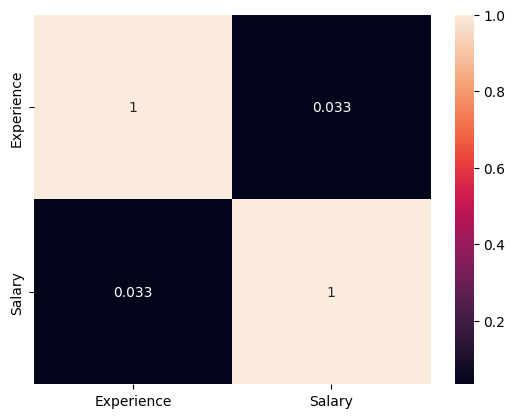

FileNotFoundError: [Errno 2] No such file or directory: 'Images/Correlation Betwwen Experience and Salary.jpg'

<Figure size 640x480 with 0 Axes>

In [44]:
sns.heatmap(corr, annot = True)
plt.show()
plt.savefig("Images/Correlation Betwwen Experience and Salary.jpg")

### Interpretation

  - A correlation near 0 implies that experience and salay are not strongly related in our data. The weak positive correlation means that there is a slightly tendency for salary to increase as experience increases, but not a strong or consistent trend.

#### Plot the distribution of salaries. Is the distribution positively or negatively skewed? What does this indicate about the salary structure in the IT industry in India?

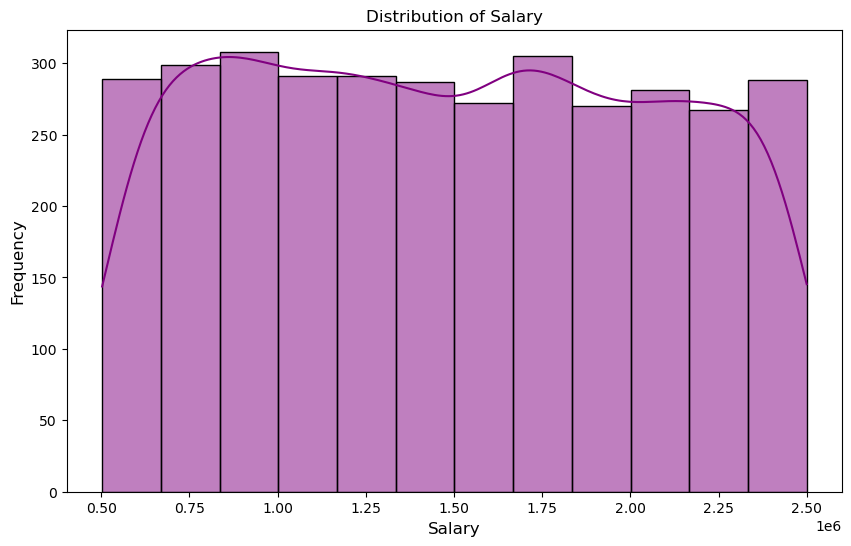

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'], bins = 12,kde=True, color = 'Purple')
plt.title('Distribution of Salary')
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('Images/Distribution of Salary.jpg')
plt.show()

#### Interpretation:

   - If the KDE curve shows a peak towards the left and tails off towards the right, the distribution is positively skewed (i.e., most salaries are on the lower end, with a few high salaries pulling the mean to the right).
   - If the KDE curve has a peak towards the right and tails off towards the left, it would be negatively skewed.
   - Looking at the chart, if the peak is toward the left and the distribution has a tail on the right, it suggests a positive skew (higher salaries are less frequent). This indicates that most people in the dataset earn lower salaries, with fewer people earning much higher salaries

#### What is the median salary based on different levels of experience (e.g., 0-3 years, 4-7 years, 8+ years)?

In [45]:
df['Salary'].median()

np.float64(1475379.5)

In [46]:
bins = [0,3,7, float('inf')]
group_names = ['0-3 Years','4-7 Years','8+ Years']


In [47]:
df['Experience Level'] = pd.cut(df['Experience (Years)'],bins = bins, labels = group_names, right=False)

C:\Users\Devansh\AppData\Local\Temp\ipykernel_8684\876975248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Experience Level'] = pd.cut(df['Experience (Years)'],bins = bins, labels = group_names, right=False)


In [48]:
median_salary_experience = df.groupby('Experience Level')['Salary'].median()
median_salary_experience

C:\Users\Devansh\AppData\Local\Temp\ipykernel_8684\2871076565.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_experience = df.groupby('Experience Level')['Salary'].median()


Experience Level
0-3 Years          NaN
4-7 Years    1472721.0
8+ Years     1475787.0
Name: Salary, dtype: float64

In [49]:

df.sort_values(by='Salary',ascending = False).head(20)

,Position,Location,Gender,Education,Experience (Years),Salary,Experience Level
1530,BMC Control Admin,New Delhi,Male,B.Sc,16,2499925,8+ Years
474,MUREX,"Cuttack, Odisha - Odisha",Male,BCA,8,2499733,8+ Years
3080,UI / UI/UX Designer,Noida,Female,B.Sc,15,2499499,8+ Years
2314,Maths Teacher,Pune,Female,B.Sc,12,2498712,8+ Years
1046,Research Analyst,Pune,Female,BCA,22,2498153,8+ Years
2773,C++,Bengaluru,Male,B.Sc,17,2497829,8+ Years
2964,Cuda Developer,Pune,Male,B.A,19,2497196,8+ Years
3283,Python Developer,Noida,Male,B.Tech/B.E.,8,2496341,8+ Years
883,SYBASE,Gurugram,NaN,B.Tech/B.E.,28,2496263,8+ Years
1141,Bigdata Eng with GCP,New Delhi,Female,Mtech,27,2494639,8+ Years
